In [1]:
import pandas as pd
from mplsoccer import VerticalPitch, FontManager, Pitch
from statsbombpy import sb
import matplotlib.pyplot as plt
import numpy as np

URL = 'https://github.com/google/fonts/blob/main/ofl/bungeeinline/BungeeInline-Regular.ttf?raw=true'
titulo = FontManager(URL)

In [2]:
sb.matches(competition_id=43, season_id=106).sort_values(by='match_date')


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
35,3857286,2022-11-20,18:00:00.000,International - FIFA World Cup,2022,Qatar,Ecuador,0,2,available,...,2023-07-25T07:19:21.209321,1,Group Stage,Al Bayt Stadium,Daniele Orsato,Félix Sánchez Bas,Gustavo Julio Alfaro,1.1.0,2,2
57,3857271,2022-11-21,15:00:00.000,International - FIFA World Cup,2022,England,Iran,6,2,available,...,2023-06-18T15:37:14.539174,1,Group Stage,Sheikh Khalifa International Stadium,Raphael Claus,Gareth Southgate,Carlos Manuel Brito Leal Queiróz,1.1.0,2,2
46,3857285,2022-11-21,18:00:00.000,International - FIFA World Cup,2022,Senegal,Netherlands,0,2,available,...,2023-06-20T10:37:16.264240,1,Group Stage,Al Thumama Stadium,Wilton Pereira Sampaio,Aliou Cissé,Louis van Gaal,1.1.0,2,2
34,3857282,2022-11-21,21:00:00.000,International - FIFA World Cup,2022,United States,Wales,1,1,available,...,2023-07-25T09:10:59.976019,1,Group Stage,Ahmad bin Ali Stadium,Abdulrahman Ibrahim Al Jassim,Gregg Berhalter,Robert Page,1.1.0,2,2
63,3857254,2022-11-22,15:00:00.000,International - FIFA World Cup,2022,Denmark,Tunisia,0,0,available,...,2023-07-29T19:44:56.738444,1,Group Stage,Education City Stadium,César Arturo Ramos Palazuelos,Kasper Hjulmand,Jalel Kadri,1.1.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,3869486,2022-12-10,17:00:00.000,International - FIFA World Cup,2022,Morocco,Portugal,1,0,available,...,2023-04-26T23:03:02.645780,5,Quarter-finals,Al Thumama Stadium,Facundo Tello Figueroa,Hoalid Regragui,Fernando Manuel Fernandes da Costa Santos,1.1.0,2,2
19,3869519,2022-12-13,21:00:00.000,International - FIFA World Cup,2022,Argentina,Croatia,3,0,available,...,2023-04-26T22:32:37.808359,6,Semi-finals,Lusail Stadium,Daniele Orsato,Lionel Sebastián Scaloni,Zlatko Dalić,1.1.0,2,2
21,3869552,2022-12-14,21:00:00.000,International - FIFA World Cup,2022,France,Morocco,2,0,available,...,2023-04-26T22:30:45.010084,6,Semi-finals,Al Bayt Stadium,César Arturo Ramos Palazuelos,Didier Deschamps,Hoalid Regragui,1.1.0,2,2
18,3869684,2022-12-17,17:00:00.000,International - FIFA World Cup,2022,Croatia,Morocco,2,1,available,...,2023-04-26T22:18:59.308194,7,3rd Place Final,Sheikh Khalifa International Stadium,Abdulrahman Ibrahim Al Jassim,Zlatko Dalić,Hoalid Regragui,1.1.0,2,2


In [3]:
partido = sb.events(match_id=3869685)

In [4]:
partido.player.value_counts()

player
Enzo Fernandez                     328
Rodrigo Javier De Paul             242
Lionel Andrés Messi Cuccittini     242
Nicolás Hernán Otamendi            215
Jules Koundé                       211
Aurélien Djani Tchouaméni          205
Cristian Gabriel Romero            203
Dayotchanculle Upamecano           198
Alexis Mac Allister                196
Raphaël Varane                     182
Adrien Rabiot                      176
Nicolás Alejandro Tagliafico       165
Julián Álvarez                     150
Kylian Mbappé Lottin               149
Theo Bernard François Hernández    145
Nahuel Molina Lucero               142
Ángel Fabián Di María Hernández    132
Randal Kolo Muani                  127
Marcus Thuram                      119
Marcos Javier Acuña                112
Antoine Griezmann                  103
Hugo Lloris                         97
Kingsley Coman                      85
Damián Emiliano Martínez            83
Eduardo Camavinga                   83
Gonzalo Ariel Mont

In [5]:
partido[['x','y']] = partido['location'].apply(pd.Series)
partido[['endx','endy']] = partido['pass_end_location'].apply(pd.Series)

In [6]:
messi2022 = partido[partido['player'] == 'Lionel Andrés Messi Cuccittini' ]

In [7]:
messi2022.type.value_counts()

type
Ball Receipt*      74
Pass               60
Carry              53
Pressure           17
Ball Recovery       7
Shot                6
Dispossessed        6
Miscontrol          3
Duel                3
Dribble             3
Foul Committed      2
Foul Won            2
Player Off          1
Player On           1
Clearance           1
Injury Stoppage     1
Block               1
Offside             1
Name: count, dtype: int64

In [8]:
pases_messi2022 = messi2022[messi2022['type'] == 'Pass' ]
pases_messi2022.pass_outcome.shape
# Si el passoutcome esta vacio es porque fue un pase correcto (convencion de StatsBomb)

(60,)

In [9]:
pases_messi2022.pass_shot_assist
#Si esta en true, es porque fue un pase clave

36       NaN
39       NaN
52       NaN
62       NaN
103      NaN
110      NaN
112      NaN
134      NaN
153      NaN
157      NaN
188      NaN
231      NaN
272      NaN
281      NaN
295      NaN
297      NaN
299      NaN
344      NaN
365      NaN
378      NaN
410      NaN
469      NaN
493      NaN
528      NaN
534      NaN
545      NaN
570      NaN
578      NaN
596      NaN
607      NaN
611      NaN
654      NaN
695      NaN
717      NaN
721      NaN
770      NaN
786      NaN
807     True
846      NaN
848      NaN
850      NaN
854      NaN
893      NaN
917      NaN
983      NaN
991      NaN
1006     NaN
1015     NaN
1017     NaN
1040     NaN
1043     NaN
1099     NaN
1154     NaN
1156    True
1157     NaN
1177     NaN
1195     NaN
1240     NaN
1262     NaN
1269     NaN
Name: pass_shot_assist, dtype: object

In [10]:
pasescorrectos2022 = pases_messi2022[pases_messi2022.pass_outcome.isna() == True][['x','y','endx','endy']]
pasescorrectos2022

,x,y,endx,endy
36,76.6,35.7,116.2,8.9
39,99.3,57.3,96.7,49.8
52,67.9,59.0,49.0,60.3
62,81.8,65.2,70.2,67.7
103,39.2,48.1,65.3,35.4
112,108.2,74.4,86.3,67.5
134,80.5,47.8,105.1,14.7
153,52.5,56.4,59.5,52.6
188,89.3,58.8,110.2,56.8
231,89.5,65.0,99.5,74.6


In [11]:
pasescorrectos2022 = pases_messi2022[pases_messi2022.pass_outcome.isna() == True]
paseserrados2022 = pases_messi2022[pases_messi2022.pass_outcome.isna() != True]
pasesclave2022 = pases_messi2022[pases_messi2022.pass_shot_assist.isna() != True]

pasescorrectos2022.shape 

(49, 98)

In [12]:
#Metodo McKay Jhons (distancia entre puntos para calcular pases progresivos, respecto del centro del arco rival)
pasescorrectos2022 = pasescorrectos2022.reset_index(drop=True)

#Distancia al medio del arco desde el inicio del pase
pasescorrectos2022['beginning'] = np.sqrt(np.square(120-pasescorrectos2022['x']) + np.square(40-pasescorrectos2022['y']))

#Distancia al medio del alco desde el fin del pase
pasescorrectos2022['end'] = np.sqrt(np.square(120-pasescorrectos2022['endx']) + np.square(40-pasescorrectos2022['endy']))


#Se itera cada x por sobre la longitud de Beginning. Calcula la division del fin sobre el inicio, y si dicho calculo es menor al 0.8, se puede decir que el aumento es del 20%, en cuanto a distancia en la cancha
pasescorrectos2022['progressive'] = [(pasescorrectos2022['end'][x]) / (pasescorrectos2022['beginning'][x]) < .8 for x in range(len(pasescorrectos2022.beginning))]
#Ejemplo de la fila 1: La distancia al arco previo al pase era de 43 metros, y despues de realizar el pase la distancia es de 31 metros, es decir, que me termine acercando al arco mas de un 20%, lo que convierte a dicho pase en un pase progresivo
#Ejemplo de la fila 2: La distancia al arco entre el comienzo del pase y el fin del pase, a penas se acorta en un metro, estando a una distancia de 25 metros, lo que conlleva a ser un pase poco progresivo
#Ejemplo de la fila 3: La distancia entre el inicio del pase y el arco, es menor que la distancia del final del pase y el arco del rival, lo que nos lleva a deducir que fue un pase para atras, poco progresivo

progresivos = pasescorrectos2022[pasescorrectos2022['progressive'] == True ]

pasescorrectos2022['delta_metros'] = pasescorrectos2022['beginning'] - pasescorrectos2022['end']

pasescorrectos2022[['beginning', 'end','progressive', 'delta_metros']]

,beginning,end,progressive,delta_metros
0,43.612498,31.331294,True,12.281204
1,26.977398,25.277065,False,1.700333
2,55.456379,73.845040,False,-18.388661
3,45.763304,56.985349,False,-11.222045
4,81.204988,54.893078,True,26.311910
5,36.367568,43.496437,False,-7.128869
6,40.262762,29.361539,True,10.901222
7,69.463732,61.798139,False,7.665592
8,35.999028,19.449422,True,16.549606
9,39.436658,40.217036,False,-0.780378


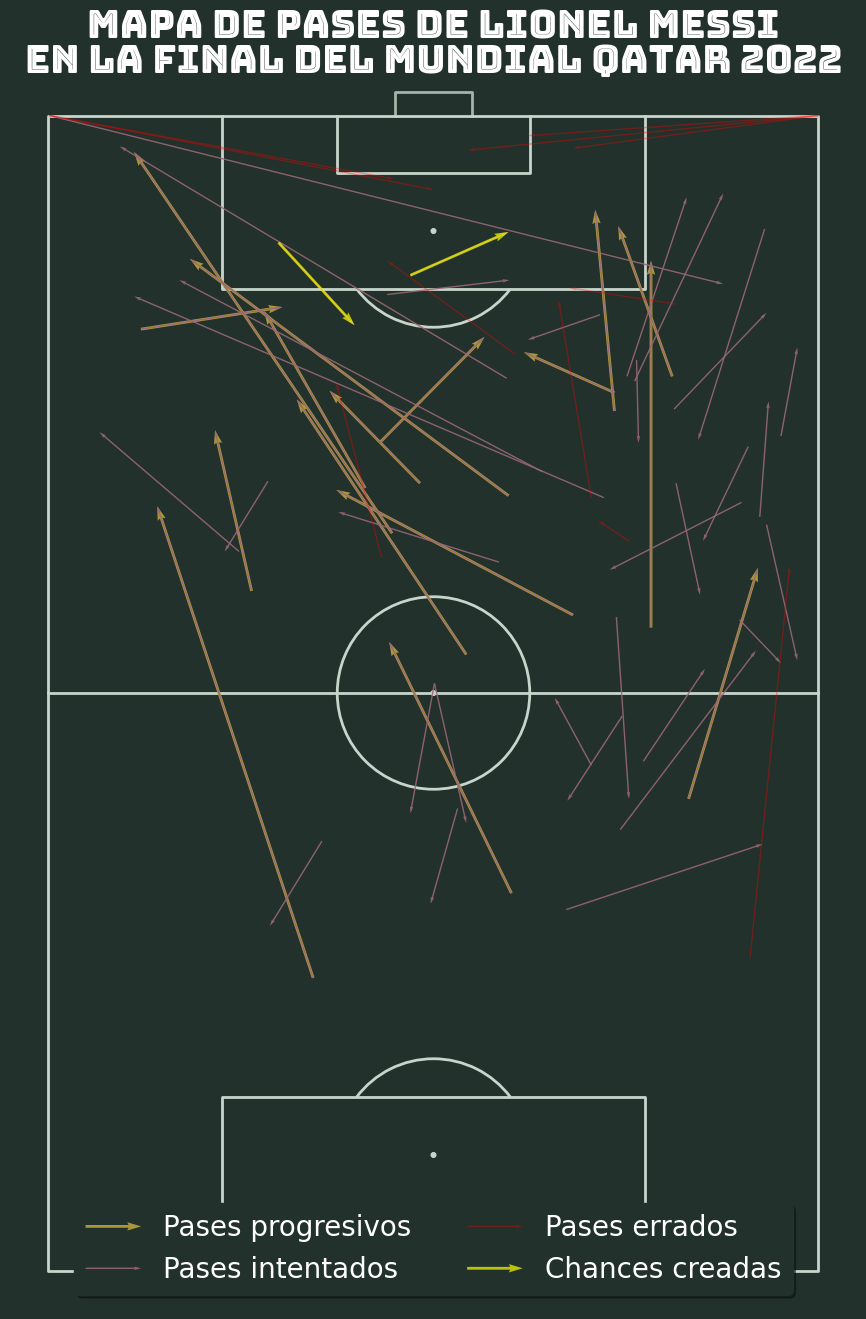

In [13]:
fig, ax = plt.subplots(figsize=(27,16))
facecolor = '#22312b'
fig.set_facecolor(facecolor)
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc', goal_type='box', goal_alpha=.8)
pitch.draw(ax=ax)


progresivos = pasescorrectos2022[pasescorrectos2022['progressive'] == True]

lc4 = pitch.arrows(progresivos['x'], progresivos['y'],progresivos['endx'], progresivos['endy'],width=2, headwidth=3, label='Pases progresivos', color='#ad993c', ax=ax, alpha=.99)
lc1 = pitch.arrows(pasescorrectos2022['x'], pasescorrectos2022['y'], pasescorrectos2022['endx'], pasescorrectos2022['endy'], width=1, headwidth=2.5, label='Pases intentados', alpha=.9, color='#996776', ax=ax)
lc2 = pitch.arrows(paseserrados2022['x'], paseserrados2022['y'], paseserrados2022['endx'], paseserrados2022['endy'], width=1, headwidth=2.5, alpha=.34, color='red', ax=ax, label='Pases errados')
lc = pitch.arrows(pasesclave2022['x'], pasesclave2022['y'], pasesclave2022['endx'], pasesclave2022['endy'], width=2, headwidth=3, alpha=.7, color='yellow', ax=ax, label='Chances creadas')
#lc3 = pitch.arrows(asistencias['x'], asistencias['y'], asistencias['endx'], asistencias['endy'], width=2.3, headwidth=3.3, alpha=.99, color='yellow', ax=ax, label='Asistencias')

l = ax.legend(shadow=True, loc='lower center', ncol=2, prop={'size': 20}, facecolor='#22312b', edgecolor='#22312b')
for text in l.get_texts():
    text.set_color("white")

plt.title('Mapa de pases de Lionel Messi\nen la Final del Mundial Qatar 2022', color='white', va='center', ha='center', fontproperties=titulo.prop, fontsize=28)

plt.savefig('test.png',dpi=300, bbox_inches='tight')